In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('Call_Center_1999_DataSet.csv', delimiter=';')

C:\Users\nahue\AppData\Local\Temp\ipykernel_12720\1498292852.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Call_Center_1999_DataSet.csv', delimiter=';')


In [7]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

In [9]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["vru_entry"] = pd.to_datetime(df["vru_entry"], format="%H:%M:%S", errors='coerce')
df["vru_exit"] = pd.to_datetime(df["vru_exit"], format="%H:%M:%S", errors='coerce')
df["q_start"] = pd.to_datetime(df["q_start"], format="%H:%M:%S", errors='coerce')
df["q_exit"] = pd.to_datetime(df["q_exit"], format="%H:%M:%S", errors='coerce')
df["ser_start"] = pd.to_datetime(df["ser_start"], format="%H:%M:%S", errors='coerce')
df["ser_exit"] = pd.to_datetime(df["ser_exit"], format="%H:%M:%S", errors='coerce')

df["vru_entry"] = df["vru_entry"].dt.time
df["vru_exit"] = df["vru_exit"].dt.time
df["q_start"] = df["q_start"].dt.time
df["q_exit"] = df["q_exit"].dt.time
df["ser_start"] = df["ser_start"].dt.time
df["ser_exit"] = df["ser_exit"].dt.time

In [10]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,00:00:31,00:00:36,5,00:00:36,00:03:09,153,HANG,00:00:00,00:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,00:34:12,00:34:23,11,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,06:55:20,06:55:26,6,06:55:26,06:55:43,17,AGENT,06:55:43,06:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,07:41:16,07:41:26,10,00:00:00,00:00:00,0,AGENT,07:41:25,07:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,08:03:14,08:03:24,10,00:00:00,00:00:00,0,AGENT,08:03:23,08:05:10,107,MICHAL,0


In [11]:
print(df["priority"].unique())

[2 0 1]


In [12]:
print(df[["vru_time", "q_time", "ser_time"]].describe())

            vru_time         q_time       ser_time
count  444448.000000  444448.000000  444448.000000
mean       10.286081      59.004304     152.561776
std        34.942136     119.470328     282.372761
min      -362.000000       0.000000       0.000000
25%         6.000000       0.000000      12.000000
50%         8.000000      16.000000      84.000000
75%        10.000000      79.000000     185.000000
max      4832.000000   28693.000000   61437.000000


In [13]:
neg_vru_time_mask = df["vru_time"] < 0

df.loc[neg_vru_time_mask, ["vru_entry", "vru_exit"]] = df.loc[neg_vru_time_mask, ["vru_exit", "vru_entry"]].values

df["vru_time"] = (pd.to_datetime(df["vru_exit"], format="%H:%M:%S") - pd.to_datetime(df["vru_entry"], format="%H:%M:%S")).dt.total_seconds()


In [14]:
print(df[["vru_time", "q_time", "ser_time"]].describe())

            vru_time         q_time       ser_time
count  444448.000000  444448.000000  444448.000000
mean       10.396357      59.004304     152.561776
std        34.909485     119.470328     282.372761
min         0.000000       0.000000       0.000000
25%         6.000000       0.000000      12.000000
50%         8.000000      16.000000      84.000000
75%        10.000000      79.000000     185.000000
max      4832.000000   28693.000000   61437.000000


In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

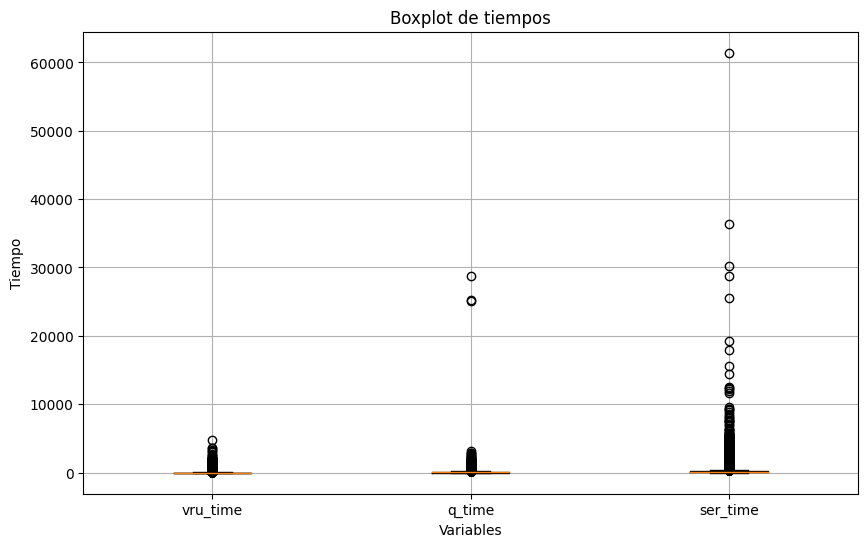

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['vru_time'], df['q_time'], df['ser_time']], labels=['vru_time', 'q_time', 'ser_time'])
plt.title('Boxplot de tiempos')
plt.ylabel('Tiempo')
plt.xlabel('Variables')
plt.grid(True)
plt.show()

In [24]:
df = df[(df["ser_time"] <= 345) & (df["q_time"] <= 150) & (df["vru_time"] <= 10)]

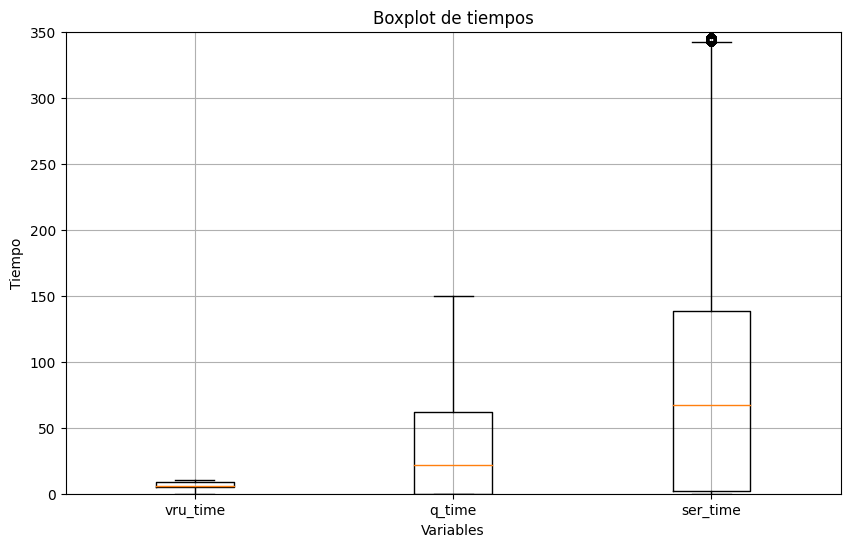

In [25]:
plt.figure(figsize=(10, 6)) 
plt.boxplot([df['vru_time'], df['q_time'], df['ser_time']], labels=['vru_time', 'q_time', 'ser_time']) 
plt.ylim(0, 350) 
plt.title('Boxplot de tiempos') 
plt.ylabel('Tiempo') 
plt.xlabel('Variables') 
plt.grid(True)

In [26]:
print(df[["vru_time", "q_time", "ser_time"]].describe())

            vru_time         q_time       ser_time
count  259661.000000  259661.000000  259661.000000
mean        6.694848      37.434124      87.542727
std         2.395472      41.198063      87.808442
min         0.000000       0.000000       0.000000
25%         5.000000       0.000000       2.000000
50%         6.000000      22.000000      67.000000
75%         9.000000      62.000000     138.000000
max        10.000000     150.000000     345.000000


In [27]:
df = df.drop(df.columns[17], axis=1)

In [28]:
df.to_csv('Call_Center_1999_DataSet_Limpio2.csv', index=False)

In [29]:
dfl = pd.read_csv('Call_Center_1999_DataSet_Limpio2.csv', delimiter=',')

C:\Users\nahue\AppData\Local\Temp\ipykernel_12720\1184760246.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dfl = pd.read_csv('Call_Center_1999_DataSet_Limpio2.csv', delimiter=',')


In [30]:
#Pregunta 1 - ¿Cuál es el nivel de servicio para los clientes Prioritarios?

# Filtrar clientes de alta prioridad
dfl_priority = dfl[dfl["priority"] == 2]
# Tiempo promedio de espera en cola (q_time)
promedio_espera = dfl_priority["q_time"].mean()
promedio_espera_redondeado = round(promedio_espera)
print(f"Tiempo promedio de espera en cola para clientes prioritarios: {promedio_espera_redondeado} segundos")
# Calcular porcentaje de llamadas con espera <= 90 segundos (SLA)
porcentaje_sla = (dfl_priority["q_time"] <= 90).mean() * 100
print(f"Porcentaje de llamadas dentro del SLA (90 segundos): {porcentaje_sla:.2f}%")

Tiempo promedio de espera en cola para clientes prioritarios: 51 segundos
Porcentaje de llamadas dentro del SLA (90 segundos): 81.75%


In [32]:
# Tiempo total en el sistema (vru_time + q_time + ser_time)
dfl_priority.loc[:, "total_time"] = dfl_priority["vru_time"] + dfl_priority["q_time"] + dfl_priority["ser_time"]
tiempo_total_promedio_en_sistema = dfl_priority["total_time"].mean()
tiempo_total_promedio_en_sistema_redondeado = round(tiempo_total_promedio_en_sistema)
print(f"Tiempo promedio en el sistema para clientes prioritarios: {tiempo_total_promedio_en_sistema_redondeado} segundos")

Tiempo promedio en el sistema para clientes prioritarios: 157 segundos


In [33]:
tasa_abandono_prioritarios = (dfl_priority["outcome"] == "HANG").mean() * 100
print(f"Tasa de abandono - Clientes prioritarios: {tasa_abandono_prioritarios:.2f}%")

Tasa de abandono - Clientes prioritarios: 17.79%


In [34]:
#Tiempo de resolución promedio (ser_time)
tiempo_resolucion_promedio = dfl_priority["ser_time"].mean()
print(f'El tiempo de resolucion promedio es {tiempo_resolucion_promedio:.2f} segundos')

El tiempo de resolucion promedio es 100.89 segundos


In [35]:

# 1. Tiempo total en servicio de agentes para clientes prioritarios
total_ser_time_prioritarios = dfl_priority["ser_time"].sum()

# 2. Calcular tiempo total disponible de los agentes (en segundos)
# Sabiendo del word que el horario de atencion es de domingo a jueves (17 horas/día) y viernes a sábado (7 horas)
horas_semanales = (5 * 17 + 2 * 7)  # Total de horas por semana
segundos_semanales = horas_semanales * 3600
numero_agentes = 8
tiempo_disponible_total = segundos_semanales * numero_agentes * 52 #(cantidad de semanas en el año)

# 3. Porcentaje de ocupación
porcentaje_ocupacion = (total_ser_time_prioritarios / tiempo_disponible_total) * 100
print(f"Porcentaje de ocupación de agentes para clientes prioritarios: {porcentaje_ocupacion:.2f}%")

Porcentaje de ocupación de agentes para clientes prioritarios: 6.63%


In [36]:
#Pregunta 2 - ¿Damos un mejor servicio que a los clientes normales?

# Filtrar clientes normales
dfl_normales = dfl[(dfl["priority"] == 0) | (dfl["priority"] == 1)]

# Tiempo promedio de espera en cola (q_time)
promedio_espera_normales = dfl_normales["q_time"].mean()
promedio_espera_redondeado_normales = round(promedio_espera_normales)
print(f"Tiempo promedio de espera en cola para clientes normales: {promedio_espera_redondeado_normales} segundos")

# Tiempo total en el sistema (vru_time + q_time + ser_time)
dfl_normales.loc[:, "total_time_n"] = dfl_normales["vru_time"] + dfl_normales["q_time"] + dfl_normales["ser_time"]
tiempo_total_promedio_en_sistema_normales = dfl_normales["total_time_n"].mean()
tiempo_total_promedio_en_sistema_normales_redondeado = round(tiempo_total_promedio_en_sistema_normales)
print(f"Tiempo promedio en el sistema para clientes normales: {tiempo_total_promedio_en_sistema_normales_redondeado} segundos")

#Tasa de abandono
tasa_abandono_normales = (dfl_normales["outcome"] == "HANG").mean() * 100
print(f"Tasa de abandono - Clientes normales: {tasa_abandono_normales:.2f}%")

#Tiempo de resolución promedio (ser_time)
tiempo_resolucion_promedio_normales = dfl_normales["ser_time"].mean()
print(f'El tiempo de resolucion promedio para clientes normales es {tiempo_resolucion_promedio_normales:.2f} segundos')

Tiempo promedio de espera en cola para clientes normales: 29 segundos
Tiempo promedio en el sistema para clientes normales: 116 segundos
Tasa de abandono - Clientes normales: 28.17%
El tiempo de resolucion promedio para clientes normales es 79.52 segundos


C:\Users\nahue\AppData\Local\Temp\ipykernel_12720\611609915.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl_normales.loc[:, "total_time_n"] = dfl_normales["vru_time"] + dfl_normales["q_time"] + dfl_normales["ser_time"]


In [37]:
# 1. Tiempo total en servicio de agentes para clientes normales
total_ser_time_normales = dfl_normales["ser_time"].sum()

# 2. Calcular tiempo total disponible de los agentes (en segundos)
# Sabiendo del word que el horario de atencion es de domingo a jueves (17 horas/día) y viernes a sábado (7 horas)
horas_semanales = (5 * 17 + 2 * 7)  # Total de horas por semana
segundos_semanales = horas_semanales * 3600
numero_agentes = 8
tiempo_disponible_total = segundos_semanales * numero_agentes * 52 #(52 = cantidad de semanas en el año)

# 3. Porcentaje de ocupación
porcentaje_ocupacion_normales = (total_ser_time_normales / tiempo_disponible_total) * 100
print(f"Porcentaje de ocupación de agentes para clientes normales: {porcentaje_ocupacion_normales:.2f}%")

Porcentaje de ocupación de agentes para clientes normales: 8.70%


In [38]:
# Diccionario con los resultados de los KPIs para cada grupo de clientes
kpi_data = {
    "KPI": [
        "Tiempo promedio de espera en cola",
        "Tiempo promedio en el sistema",
        "Tasa de abandono",
        "Tiempo de resolución promedio",
        "Porcentaje de ocupación de agentes"
    ],
    "Clientes Normales": [
        promedio_espera_normales,
        tiempo_total_promedio_en_sistema_normales,
        tasa_abandono_normales,
        tiempo_resolucion_promedio_normales,
        porcentaje_ocupacion_normales
    ],
    "Clientes Prioritarios": [
        promedio_espera,
        tiempo_total_promedio_en_sistema,
        tasa_abandono_prioritarios,
        tiempo_resolucion_promedio,
        porcentaje_ocupacion
    ]
}

# Convertir a DataFrame para facilitar la visualización
kpi_dfl = pd.DataFrame(kpi_data)
kpi_dfl

,KPI,Clientes Normales,Clientes Prioritarios
0,Tiempo promedio de espera en cola,29.327128,50.931556
1,Tiempo promedio en el sistema,116.289815,157.281177
2,Tasa de abandono,28.168458,17.787904
3,Tiempo de resolución promedio,79.523751,100.893613
4,Porcentaje de ocupación de agentes,8.701236,6.630657


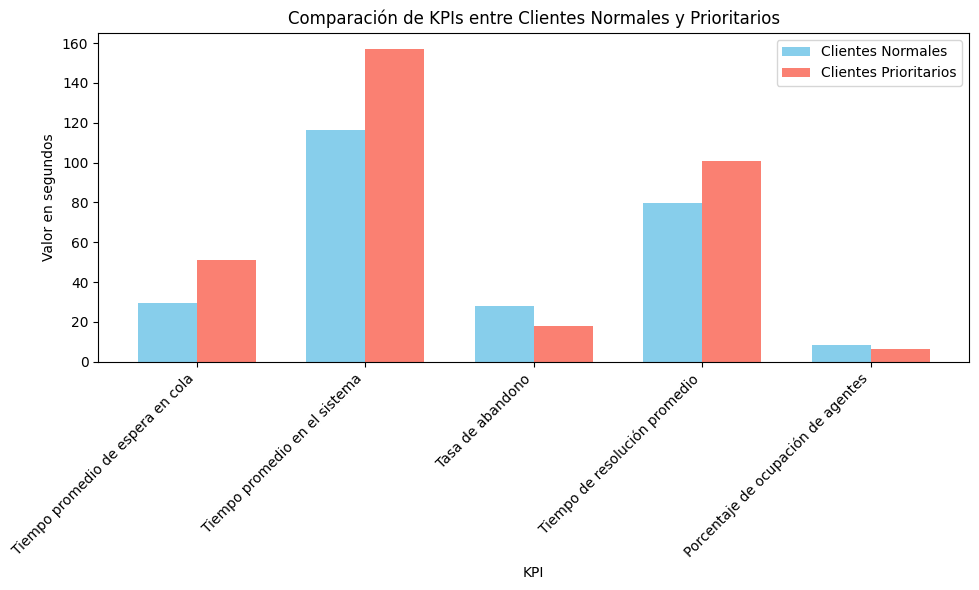

In [39]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear gráfico de barras agrupadas
bar_width = 0.35  # Ancho de las barras
x = range(len(kpi_dfl))  # Posiciones para los grupos de barras

# Graficar cada grupo de clientes
plt.bar(x, kpi_dfl["Clientes Normales"], width=bar_width, label="Clientes Normales", color="skyblue")
plt.bar([p + bar_width for p in x], kpi_dfl["Clientes Prioritarios"], width=bar_width, label="Clientes Prioritarios", color="salmon")

# Configuración del gráfico
plt.xlabel("KPI")
plt.ylabel("Valor en segundos")
plt.title("Comparación de KPIs entre Clientes Normales y Prioritarios")
plt.xticks([p + bar_width / 2 for p in x], kpi_dfl["KPI"], rotation=45, ha="right")
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
#CONCLUSIÓN 2: habiendo sacado todos los outliers (tomando como referencia el boxplot), el servicio a clientes prioritarios
# no cambia, es decir, tienen peor servicio que los normales. 